In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
data = pd.read_csv("loan_data_clean.csv")
data.head()

,grade,defaulter,amount,interest,years,ownership,income,age
0,B,0,5000,10.65,10,RENT,24000.0,33
1,C,0,2400,10.99,25,RENT,12252.0,31
2,C,0,10000,13.49,13,RENT,49200.0,24
3,A,0,5000,10.99,3,RENT,36000.0,39
4,E,0,3000,10.99,9,RENT,48000.0,24


In [11]:
ownership =  data.ownership.value_counts()
ownership_type = ownership.index.values
ownership_count = ownership.values

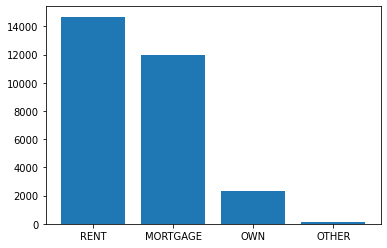

In [31]:
plt.bar(ownership_type,ownership_count)
plt.show()

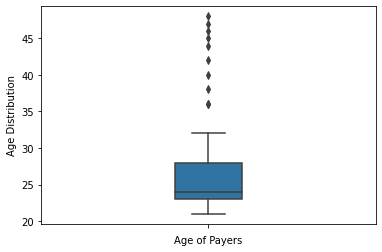

In [89]:
age_dist = data[data.ownership==own_type].age.values
sns.boxplot(y=age_dist, width=0.2)
plt.ylabel('Age Distribution')
plt.xlabel('Age of Payers')
plt.show()


In [27]:
def gen_dist(ages):
    gen = []
    for age in ages:
        if age in np.arange(9,25,1):
            gen.append("Gen Z")
        elif age in np.arange(25,41,1):
            gen.append("Millennials")
        elif age in np.arange(41,57,1):
            gen.append("Gen X")
        elif age in np.arange(57,67,1):
            gen.append("Boomers II")
    return gen

In [43]:
def gen_plot(own_type):
    gen_dict = Counter(gen_dist(data[data.ownership==own_type].age.values))
    gen_names = gen_dict.keys()
    gen_count = gen_dict.values()
    plt.bar(gen_names,gen_count)
    plt.title(own_type)
    plt.show()

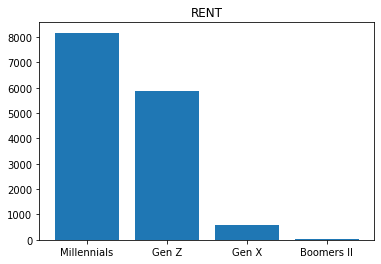

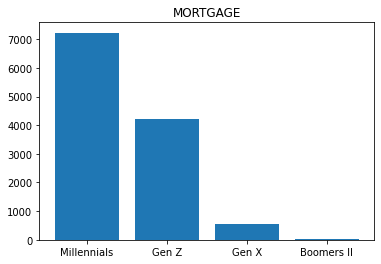

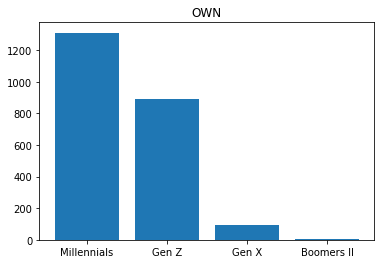

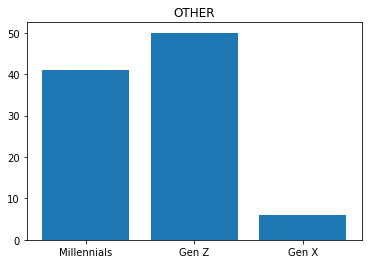

In [44]:
for  own_type in ['RENT', 'MORTGAGE', 'OWN', 'OTHER']:
    gen_plot(own_type)

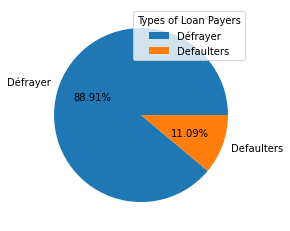

In [69]:
def_1 = data[data.defaulter==1].shape[0]
def_0 = data[data.defaulter==0].shape[0]
payer_count = np.array([def_0,def_1])
payers = ["Défrayer", "Defaulters"]

plt.pie(payer_count, labels = payers, autopct='%1.2f%%')
plt.legend(title = "Types of Loan Payers")
plt.show() 

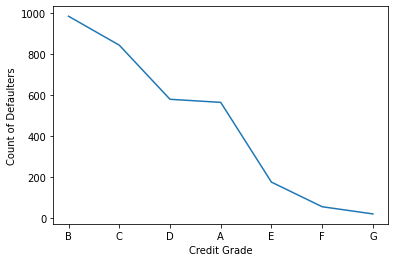

In [129]:
df = data[data.defaulter==1]
df.grade.value_counts()
plt.xlabel("Credit Grade")
plt.ylabel("Count of Defaulters")
df.grade.value_counts().plot()
plt.show()

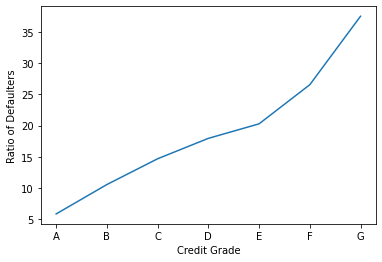

In [126]:
df1 = data[data.defaulter==1].grade.value_counts()
df2 = data.grade.value_counts()
plt.xlabel("Credit Grade")
plt.ylabel("Ratio of Defaulters")
((df1/df2)*100).plot()
plt.show()

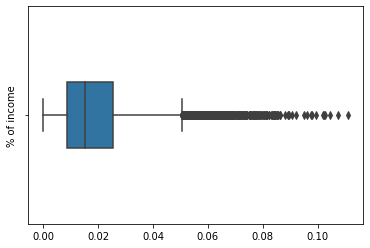

In [153]:
amt = data.amount
rate = data.interest
inc = data.income
si_ratio = (amt*rate*0.01)/inc 
plt.ylabel("% of income")
plt.xlabel("")
a = sorted(si_ratio)
sns.boxplot(x = a,width = 0.3)
plt.show()